# Vehicle Sales Data Analysis

### About the file

The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

In [2]:
# import the source file
filepath = r"D:\datasets\vehicles sales\car_prices.csv"
df_raw= pd.read_csv(filepath)
df_raw

year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automatic  5xyktca69fg561319    ca        5.0    9393.0   white   
2         automatic  wba3c1c51ek116351    ca       45.0    1331.0    gray   
3         automatic  yv1612tb4f1310987    ca       41.0   14282.0   white   
4         automatic  wba6b2c57ed129731    ca       43.0    2641.0    gray   
...             ...                ...   ...        ...       ...     ...   
558832          NaN  knalw4d4xf6019304    in       45.0   18255.0  silver   
558833    automatic  3c6td5et6cg112407    wa        5.0   54393.0   white   
558834    automatic  5uxzw0c58cl668465    ca       48.0   50561.0   black   
558835    automatic  1n4al3ap0fc216050    ga       38.0   16658.0   white   
558836    automatic  1ftfw1et2eke87277    ca       34.0   15008.0    gray   

       interior                                             seller      mmr  \
0         black                            kia motors america  inc  20500.0   
1         beige                            kia motors america  inc  20800.0   
2         black             financial services remarketing (lease)  31900.0   
3         black                            volvo na rep/world omni  27500.0   
4         black             financial services remarketing (lease)  66000.0   
...         ...                                                ...      ...   
558832    black                                   avis corporation  35300.0   
558833    black                                    i -5 uhlmann rv  30200.0   
558834    black             financial services remarketing (lease)  29800.0   
558835    black  enterprise vehicle exchange / tra / rental / t...  15100.0   
558836     gray                   ford motor credit company llc pd  29600.0   

        sellingprice                                 saledate  
0            21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1            21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2            30000.0  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3            27750.0  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4            67000.0  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  
...              ...                                      ...  
558832       33000.0  Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)  
558833       30800.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558834       34000.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558835       11100.0  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)  
558836       26700.0  Thu May 28 2015 05:30:00 GMT-0700 (PDT)  

[558837 rows x 16 columns]

# Understanding the Variables
    Below are the supposed meaning of the data columns. This is to better understand the data.
**year** :- The manufacturing year of the vehicle. \
**make** :- The brand or manufacturer of the vehicle. \
**model** :- The specific model of the vehicle. \
**trim** :- Additional designation for the vehicle model. \
**body** :- The body type of the vehicle (e.g., SUV, Sedan). \
**transmission** :- The type of transmission in the vehicle (e.g., automatic). \
**vin** :- Vehicle Identification Number, a unique code for each vehicle. \
**color** :- Color of the body of the vehicle. \
**interior** :- Color of the interior of the vehicle. \
**state** :- The state where the vehicle is registered. \
**condition** :- Condition of the vehicle, possibly rated on a scale. \
**odometer** :- The mileage or distance traveled by the vehicle.  \
**seller** :- The entity selling the vehicle. \
**mmr** :- Manheim Market Report, possibly indicating the estimated market value of the vehicle. \
**sellingprice** :- The price at which the vehicle was sold. \
**saledate** :- The date and time when the vehicle was sold.

In [3]:
#check the shape of the dataframe
df_raw.shape

(558837, 16)

There are **559937** rows and **16** columns in the raw dataframe.

# Data Cleaning

In [4]:
#drop the column 'vin' this is not needed in our analysis
df_raw.drop(['vin'], axis=1 , inplace=True)

In [5]:
df_raw.duplicated().sum()

0

In [6]:
df_raw.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
df=df_raw.dropna()

In [8]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [9]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

In [10]:
replace = { "Koup" : "Coupe",
            "sedan": "Sedan",
            "g sedan": "G Sedan",
            "g coupe": "G Coupe",
            "van": "Van",
            "suv": "SUV",
            "crew cab": "Crew Cab",
            "convertible": "Convertible",
            "coupe": "Coupe",
            "wagon": "Wagon",
            "hatchback": "HatchBack",
            "king cab": "King Cab",
            "elantra coupe": "Elantra Coupe",
            "genesis coupe": "Genesis Coupe",
            "minivan": "Minivan",
            "double cab": "Double Cab",
            "crewmax cab": "CrewMax Cab",
            "access cab": "Access Cab",
            "cts coupe": "CTS Coupe",
            "supercrew": "SuperCrew",
            "e-series van": "E-Series Van",
            "extended cab": "Extended Cab",
            "supercab": "SuperCab",
            "g convertible": "G Convertible",
            "koup": "Coupe",
            "regular cab": "Regular Cab",
            "quad cab": "Quad Cab",
            "cts-v coupe": "CTS-V Coupe",
            "g37 convertible": "G37 Convertible",
            "club cab": "Club Cab",
            "xtracab": "Xtracab",
            "q60 convertible": "Q60 Convertible",
            "cts wagon": "CTS Wagon",
            "mega cab": "Mega Cab",
            "cab plus 4": "Cab Plus 4",
            "q60 coupe": "Q60 Coupe",
            "beetle convertible": "Beetle Convertible",
            "tsx sport wagon": "TSX Sport Wagon",
            "promaster cargo van": "Promaster Cargo Van",
            "granturismo convertible": "GranTurismo Convertible",
            "transit van": "Transit Van",
            "regular-cab": "Regular Cab"}

df["body"].replace(replace, inplace=True)

d:\python\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'Transit Van', 'HatchBack'], dtype=object)

In [12]:
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [13]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [14]:
df['color'].replace({"—": "Unknown"}, inplace=True)

In [15]:
df['interior'].unique()

array(['black', 'beige', 'tan', 'brown', '—', 'gray', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

In [16]:
df['interior'].replace({"—": "Unknown"}, inplace=True)

In [17]:
df['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1995, 1997, 1994,
       1993, 1992, 1991, 1990], dtype=int64)

In [18]:
df.describe()

year      condition       odometer            mmr  \
count  472325.000000  472325.000000  472325.000000  472325.000000   
mean     2010.210980      30.774177   66701.732040   13837.058964   
std         3.822151      13.286866   51939.586894    9532.229273   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      24.000000   28137.000000    7425.000000   
50%      2012.000000      35.000000   51085.000000   12300.000000   
75%      2013.000000      41.000000   96590.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  472325.000000  
mean    13690.512058  
std      9613.033738  
min         1.000000  
25%      7200.000000  
50%     12200.000000  
75%     18200.000000  
max    230000.000000

# Exploratory Data Analysis

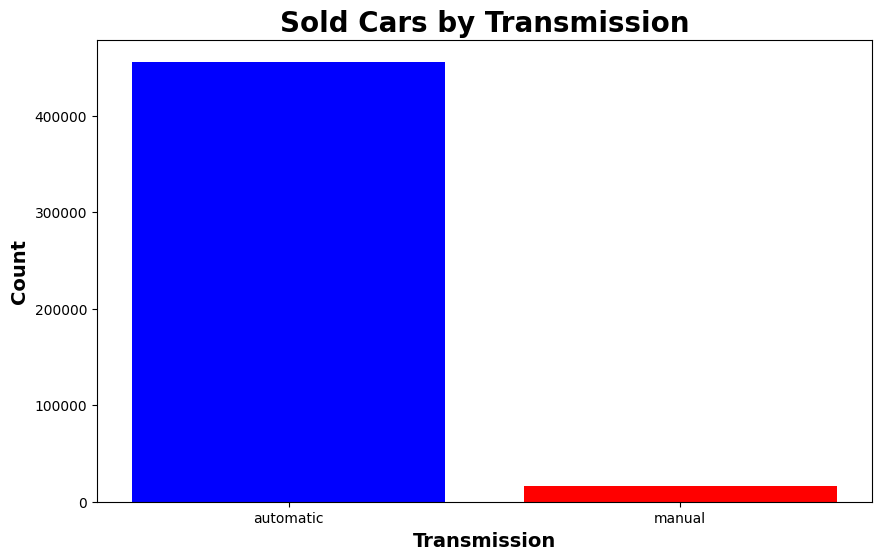

In [19]:
x = df['transmission'].value_counts()

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(x=x.index, height=x, color=['b', 'r'])

plt.xlabel("Transmission", fontweight='bold', fontsize=14)
plt.ylabel("Count", fontweight='bold', fontsize=14)

plt.title("Sold Cars by Transmission", fontweight='bold', fontsize=20)

plt.show()

**Automatic** Transmission cars are sold more with **~97%** of the total.

C:\Users\HP\AppData\Local\Temp\ipykernel_14548\3661430588.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


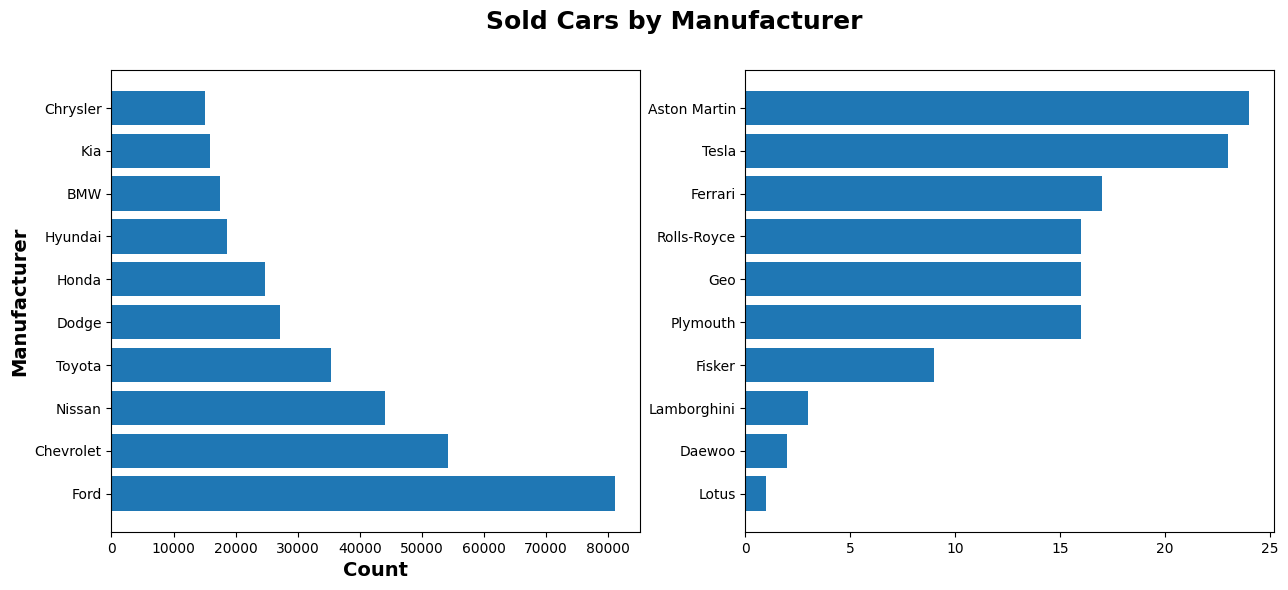

In [20]:
x1=df['make'].value_counts().head(10)
y1=df['make'].value_counts(ascending=True).head(10)

fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1,2,1)
plt.barh(x1.index, width=x1)

plt.xlabel("Count", fontweight='bold', fontsize=14)
plt.ylabel("Manufacturer", fontweight='bold', fontsize=14)

plt.subplot(1,2,2)
plt.barh(y1.index, width=y1)

plt.suptitle("Sold Cars by Manufacturer", fontweight='bold', fontsize=18)
plt.show()

# Observations

- **Ford** is by far the most sold car with **~24.3%** of the total and followed by **Chevrolet** with **~16.2%** of the total.
- **Lotus** and **Daewoo** brands are the least sold with ~0.8%(1 unit) and ~1.6%(2 units) of the total, respectively.

C:\Users\HP\AppData\Local\Temp\ipykernel_14548\3623240637.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


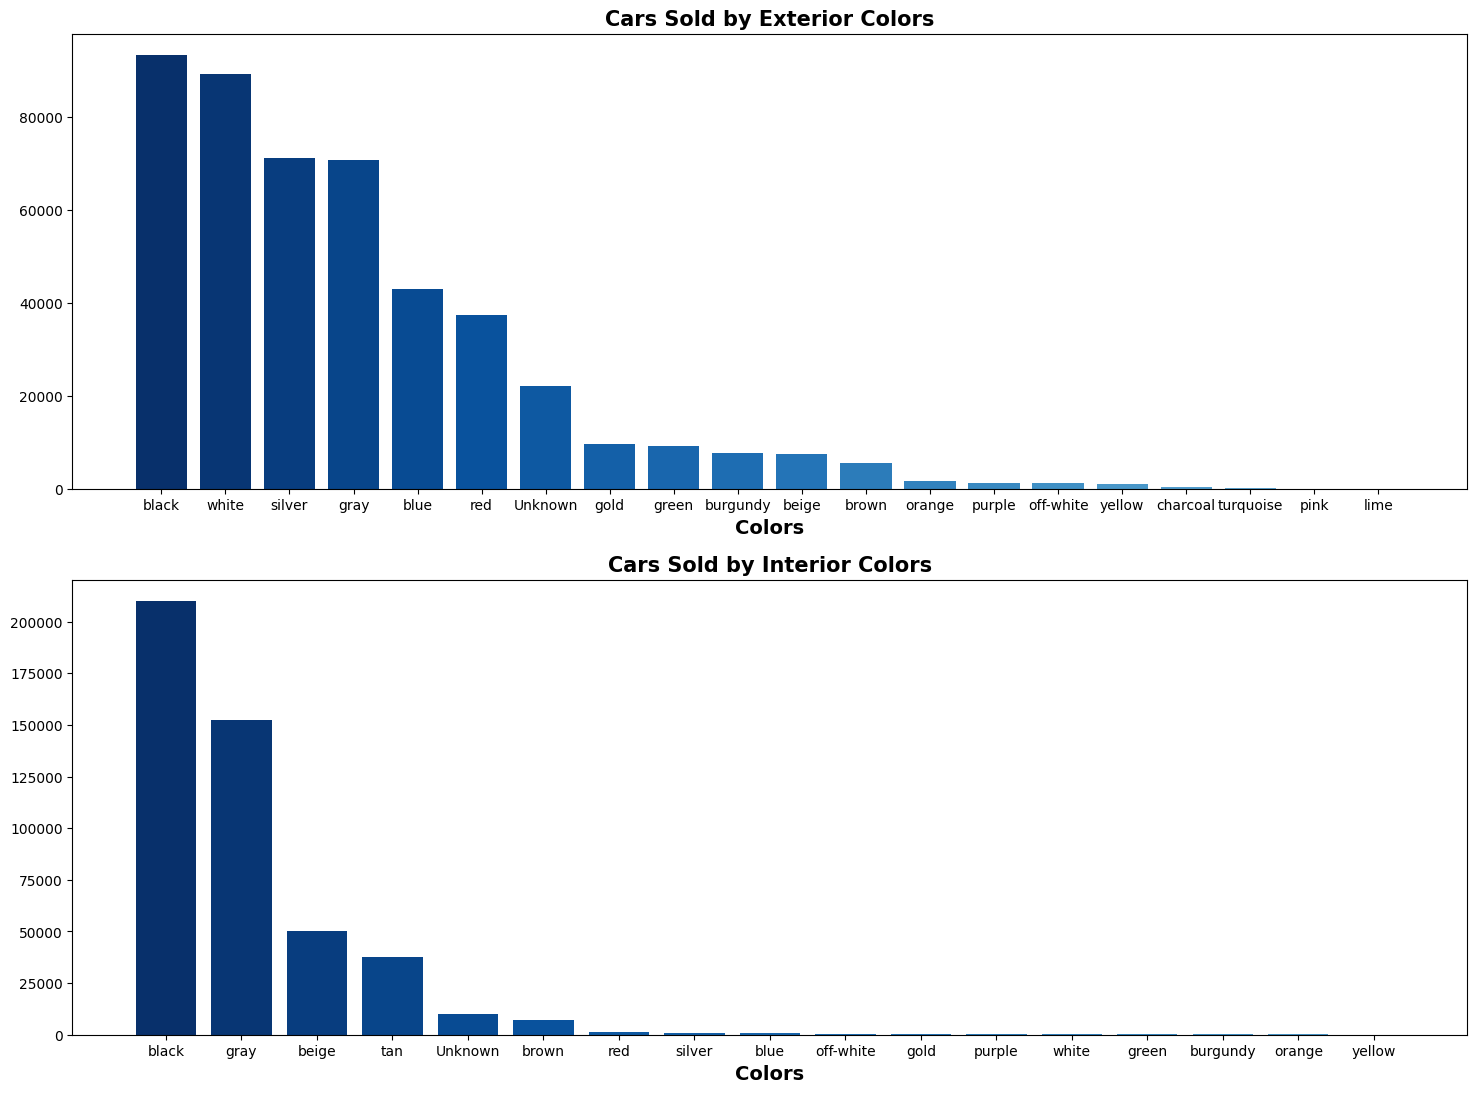

In [21]:
x2 = df['color'].value_counts()
y2 = df['interior'].value_counts()

fig, ax = plt.subplots(figsize=(18,13))
colors1=plt.get_cmap('Blues')(np.linspace(1, 0.5, len(x2)))
colors2=plt.get_cmap('Blues')(np.linspace(1, 0.5, len(x2)))

#plot1
plt.subplot(2,1,1)
plt.bar(x=x2.index, height=x2, color=colors1)

plt.xlabel("Colors", fontweight='bold', fontsize=14)
plt.title("Cars Sold by Exterior Colors", fontweight='bold', fontsize=15)

#plot2
plt.subplot(2,1,2)
plt.bar(x=y2.index, height=y2, color=colors2)

plt.title("Cars Sold by Interior Colors", fontweight='bold', fontsize=15)

plt.xlabel("Colors", fontweight='bold', fontsize=14)

plt.show()

From the graph above, the following are my observations:
- Most popular **EXTERIOR** color of a car is **Black**  and **White** with **~25.4%** and **~18.9%** of the total sold cars are of this color, respectively.
- For **INTERIOR** colors, the most popular is **Black** and **Gray** with **~44.4%** and **~32.3%** of the total, respectively.
- The least favorite **EXTERIOR** colors are **Lime** and **pink** with **~0.7%**(12 units) and **~2.2%**(39 units), respectively.
- Least Favorite **INTERIOR** colors are **Yellow** and **Orange** with **~0.004%**(19 units) and **~0.02%**(124 units) of the total sold cars, respectively.

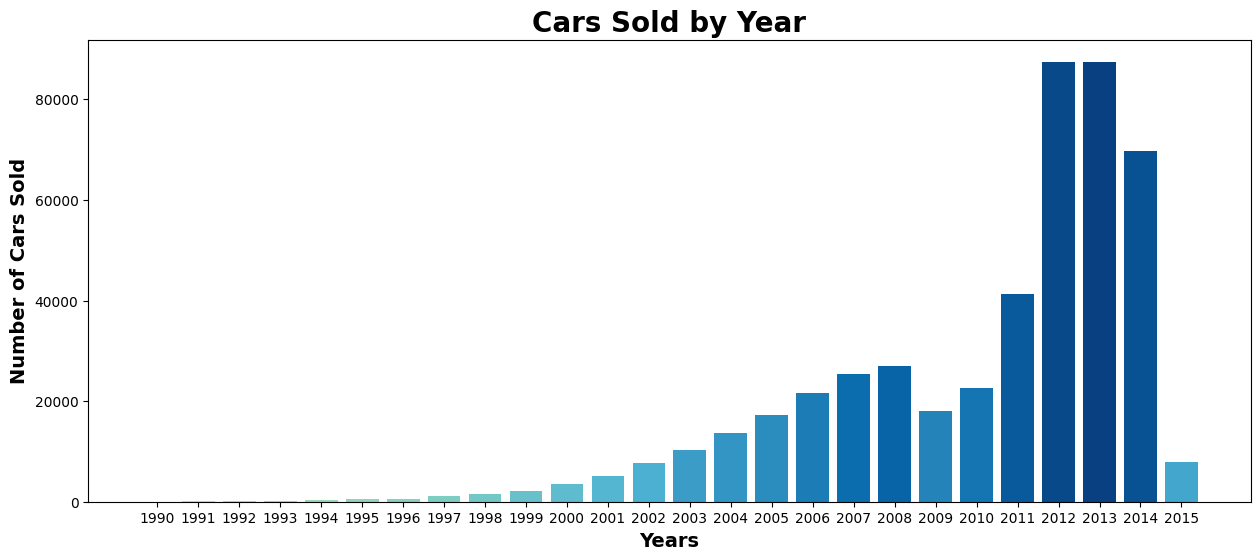

In [22]:
years=df['year'].value_counts()

fig, ax = plt.subplots(figsize=(15,6))
colors=plt.get_cmap("GnBu")(np.linspace(1,0.3,len(years)))

plt.bar(x=years.index, height=years, color=colors)

plt.xticks(years.index)

plt.xlabel("Years", fontweight='bold', fontsize=14)
plt.ylabel("Number of Cars Sold", fontweight='bold', fontsize=14)
plt.title("Cars Sold by Year", fontweight='bold', fontsize=20)
plt.show()

# Observations


- Since 1990, there has been an exponential growth of Cars sold.
- Small drop on sales in year 2009 to 2010 this might have been affected by recession or any event that could affect the market.
- A sudden drop of sales in 2015 might be due to limited sample size on that year. 

C:\Users\HP\AppData\Local\Temp\ipykernel_14548\915791271.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


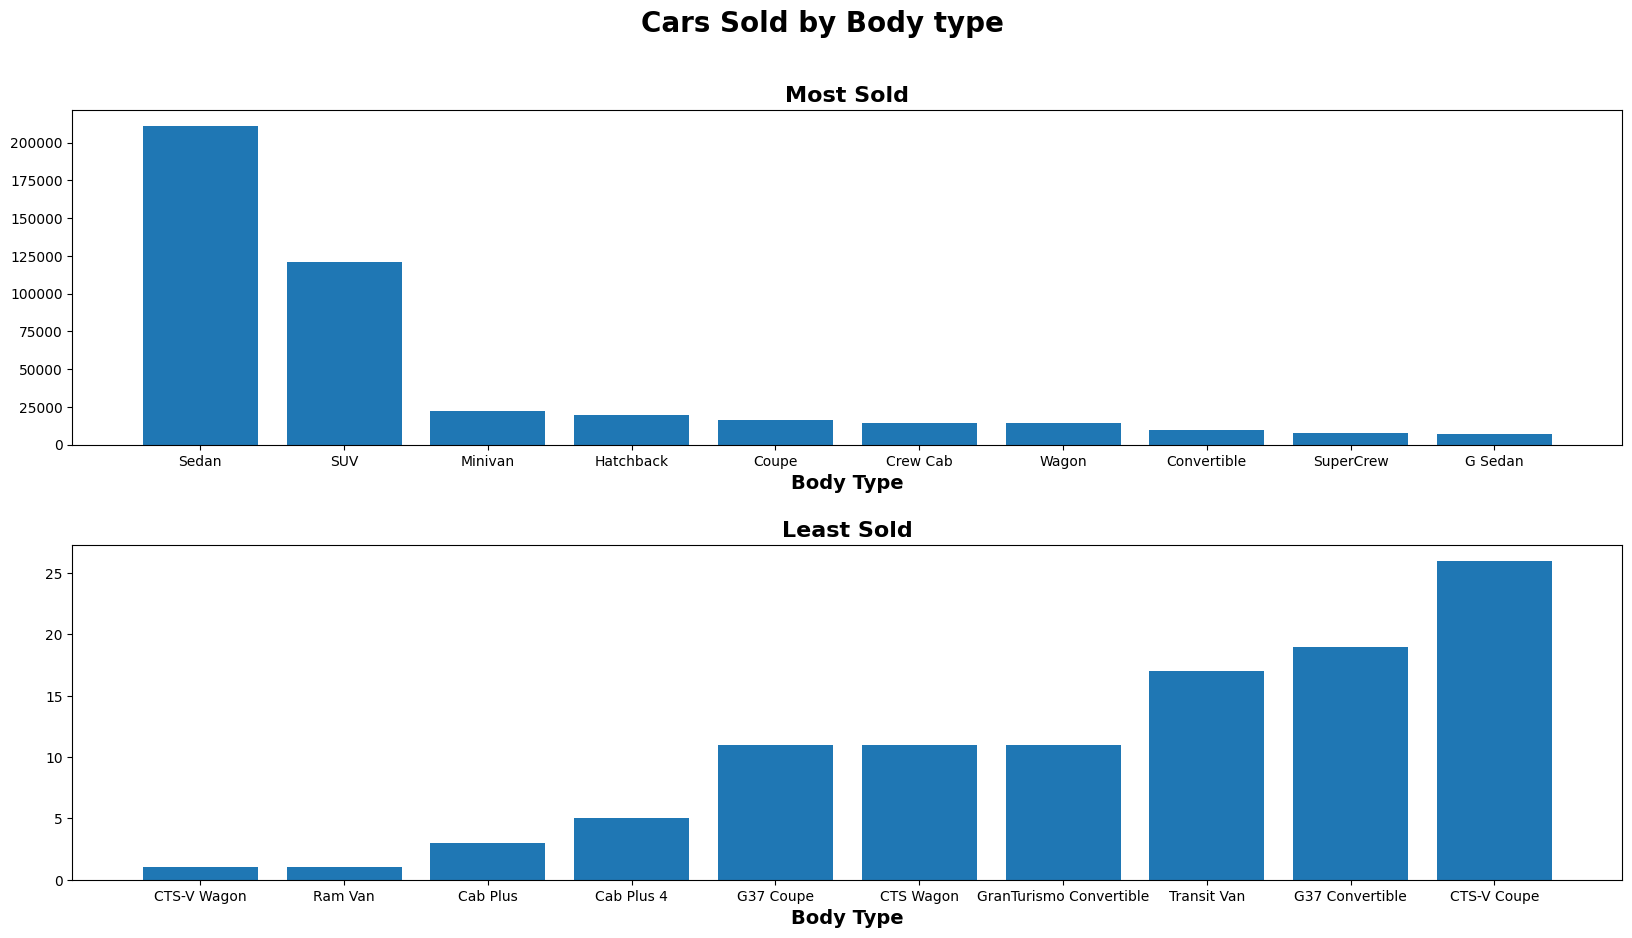

In [23]:

body_count1 = df['body'].value_counts().head(10)
body_count2 = df['body'].value_counts(ascending=True).head(10)

fig, ax = plt.subplots(figsize=(20,10))
#plot1
plt.subplot(2,1,1)
plt.bar(x=body_count1.index, height=body_count1)

plt.title("Most Sold", fontweight='bold', fontsize=16)
plt.xlabel("Body Type", fontweight='bold', fontsize=14)

#plot2
plt.subplot(2,1,2)
plt.bar(x=body_count2.index, height=body_count2)

plt.title("Least Sold", fontweight='bold', fontsize=16)
plt.xlabel("Body Type", fontweight='bold', fontsize=14)

#general title
plt.suptitle("Cars Sold by Body type", fontweight='bold', fontsize=20)
plt.subplots_adjust(hspace=0.3)
plt.show()

# Observations

- **Sedan** and **SUV** body types is the most popular with ~47.8% and ~27.3% of the total car solds, respectively.
- **CTS-V Wagon** and **Ram Van** is the least favorite with only 1 units sold each.

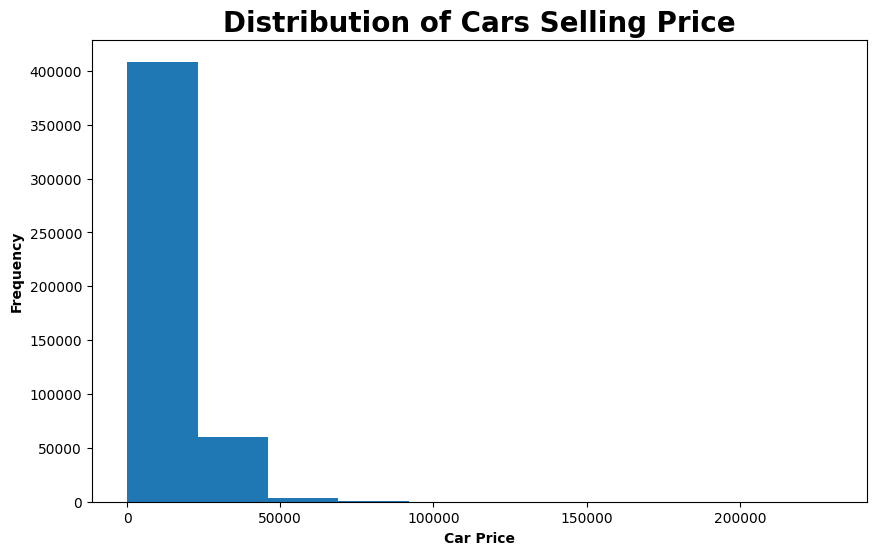

In [24]:
car_prices=df['sellingprice']


fig, ax = plt.subplots(figsize=(10,6))
plt.hist(car_prices)
plt.title("Distribution of Cars Selling Price", fontweight='bold', fontsize=20)

plt.xlabel("Car Price", fontweight='bold', fontsize=10)
plt.ylabel("Frequency", fontweight='bold', fontsize=10)
plt.show()

# Observations

- The cars selling price are highly skewed on the right.
- The skewness of the data observed might be because of luxury cars(e.g., Ferrari)

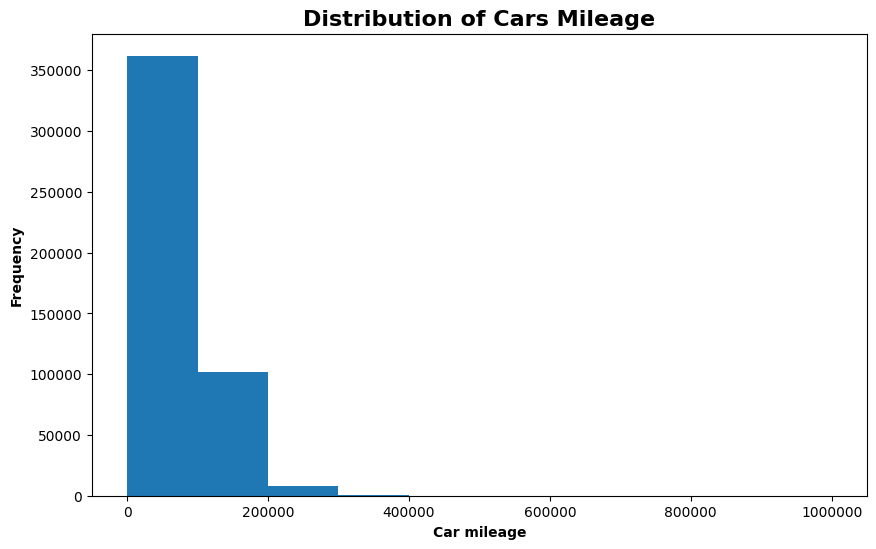

In [25]:
car_km_driven=df['odometer']

fig, ax = plt.subplots(figsize=(10,6))
plt.hist(car_km_driven)

plt.title("Distribution of Cars Mileage", fontweight='bold', fontsize=16)
ax.get_xaxis().get_major_formatter().set_scientific(False)

plt.xlabel("Car mileage", fontweight='bold', fontsize=10)
plt.ylabel("Frequency", fontweight='bold', fontsize=10)

plt.show()

# Observations
- Cars mileage are highly skewed on the right.Some cars are used alot.
- **~76.6%** of total cars sold have less than 100000 mileage and **~98.1%** that have less than 200000 mileage.
- 60 units with 999999 mileage. Cool!

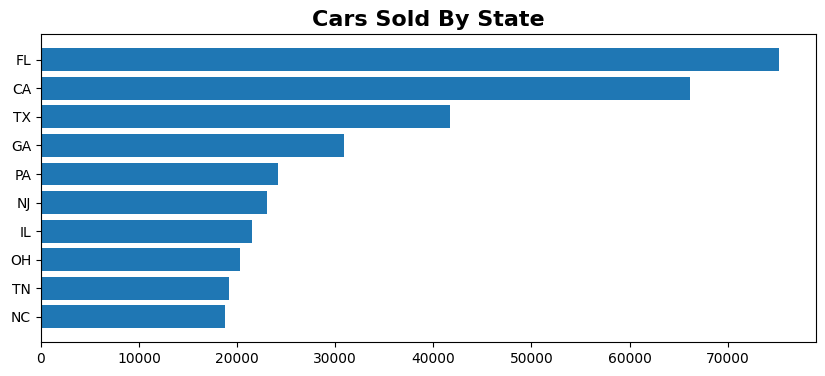

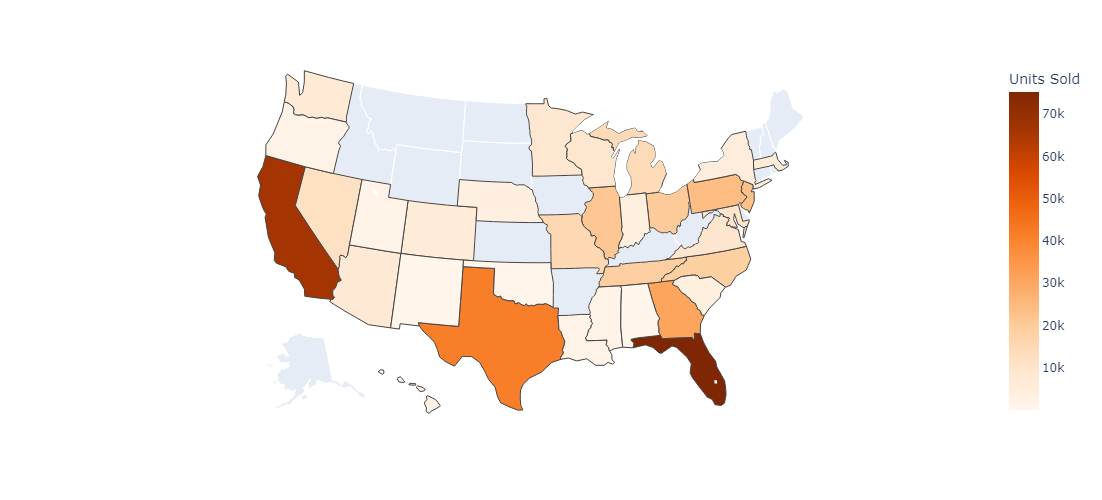

In [26]:
cars_state=df['state'].str.upper().value_counts(ascending=True).tail(10)

fig, ax= plt.subplots(figsize=(10,4))

plt.barh(y=cars_state.index, width=cars_state)

plt.title("Cars Sold By State", fontweight='bold', fontsize=16)
plt.show()

#make the state data uppercase
cars_state2=df['state'].str.upper().value_counts()

fig = px.choropleth(locations=cars_state2.index,  # State codes
                    locationmode='USA-states',
                    color=cars_state2,  # State values
                    color_continuous_scale='Oranges',  # Color scale
                    scope='usa',
                    labels={'color':'Units Sold'},
                    width = 800,
                    height = 500)

# Show the plot
fig.show()

# Observations
- The state of **Florida(FL)** has the most units sold with ~22.1% of the total.
- Florida and California are by far have the most units sold with ~42% of the total. This difference might be due to economy difference to the other states.
- The state of **Alabama(AL)** has the least units sold(25 units).
- There are also states with no Sales(e.g., **Alaska**)

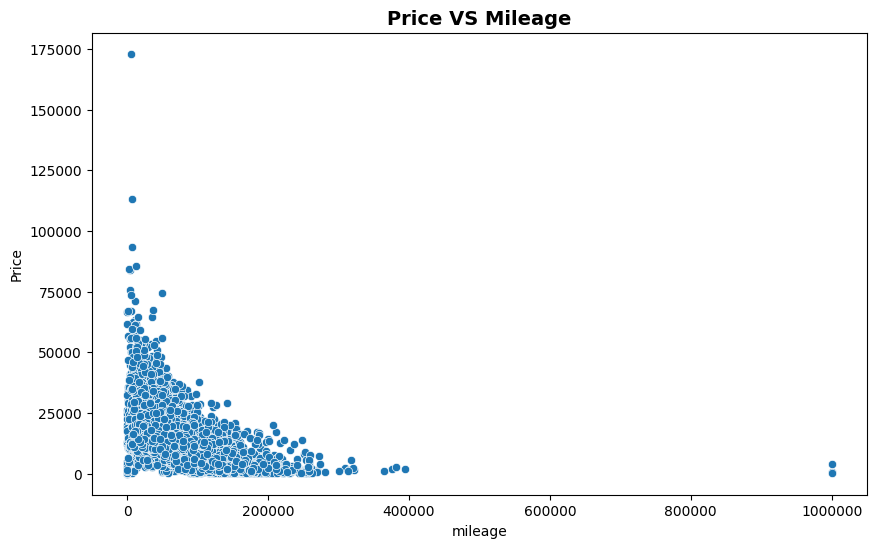

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df.sample(10000), x='odometer', y='sellingprice')

ax.set_xlabel("mileage")
ax.set_ylabel("Price")
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_title("Price VS Mileage", fontweight='bold', fontsize=14)
plt.show()

# Observations
- From the graph above, price and mileage are highly unrelated.
- More expensive cars have lower mileage.

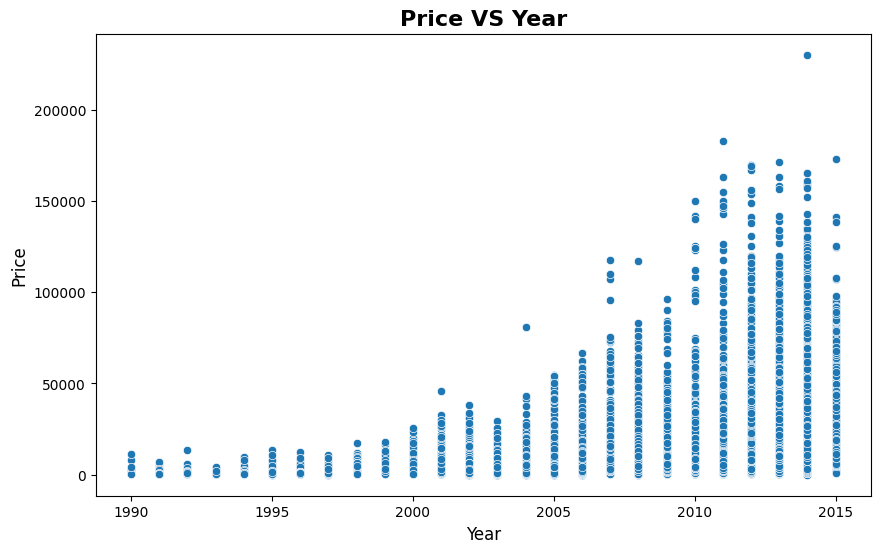

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x='year', y='sellingprice')

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price", fontsize=12)

ax.set_title("Price VS Year", fontweight='bold', fontsize=16)
plt.show()

# Observation

- General price of cars have increased throughout the years.

In [30]:
df.groupby('transmission')['sellingprice'].mean()

transmission
automatic    13774.510142
manual       11349.721305
Name: sellingprice, dtype: float64

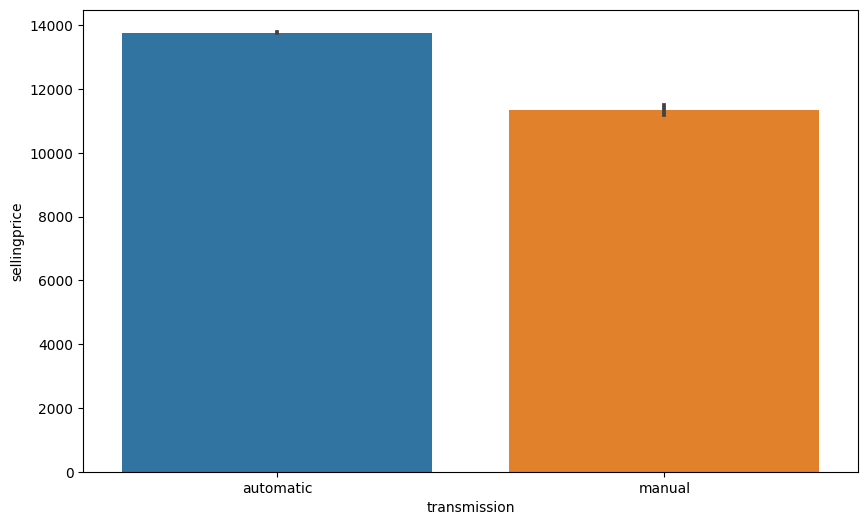

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df, x='transmission', y='sellingprice')

plt.show()

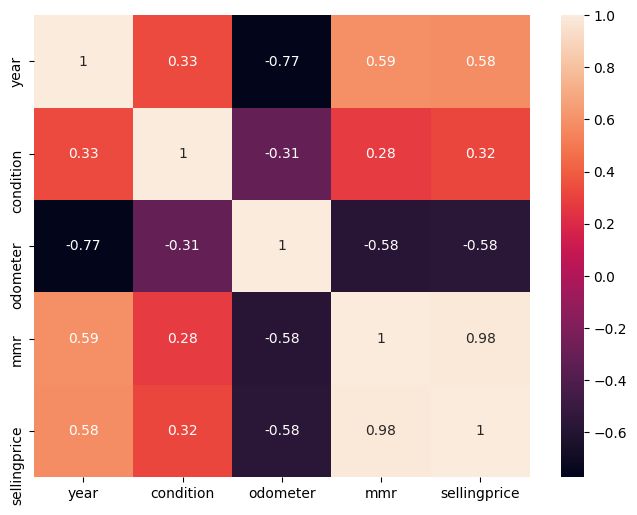

In [32]:
corr = df.loc[:,df.dtypes != 'object'].corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True)

plt.show()

# OBSERVATIONS
- Year and Sellingprice are highly correlated. Price increases every year.
- Year and mileage are highly correlated, although negatively. This is expected since older cars have more mileage.
- Selling price and mileage are also moderately correlated. Prices tends to be higher when it has lower mileage.